# 2023-1 Artificial Intelligence (01)
## Homework #2: Implementation of a CNN with TensforFlow Keras
---
Copyright (c) Prof. Jaehyeong Sim 

Department of Computer Science and Engineering

ELTEC College of Engineering

Ewha Womans University

## Guideline
### Introduction
> Here in this homework assignment 2, we will implement a CNN using TensorFlow Keras library.

### Your job
1. Please complete the code. You only have to write the parts marked as **### Please fill here**.
2. Please run your code with GPU session
3. Please answer the questions at the bottom of this notebook.

### Submission guide
1. Please rename the completed skeleton file to **HW2.ipynb**.
2. Zip the file into ***STUDENT_ID*.zip**. Your own student ID goes to *STUDENT_ID*. For example, if your student ID is 2312345, the file name should be **2312345.zip**
3. Turn in the zip file into the Ewha CyberCampus.

⚠ If you doesn't follow the submission guide above, you will get **5 point deduction** from this homework score.

### Importing necessary libraries

In [110]:
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Loading and preprocessing MNIST dataset

In [111]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')
X_train /= 255
X_valid /= 255
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

### Define residual block
**Parameters:**
*   x: input
*   ch: output channel size
*   k: kernel size

**Return:**
*   final output

**The diagram of residual block:**

![[2023-1 AI] HW2.png](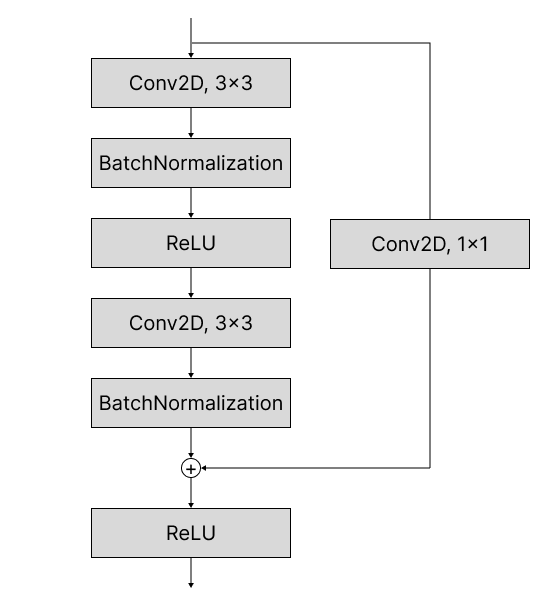)

In [112]:
def ResidualBlock(x, ch, k):
    X_shortcut = x
    
    X = layers.Conv2D(ch, k, padding='SAME')(x)
    X = layers.BatchNormalization()(x)
    X = layers.Activation('relu')(x)
    
    X = layers.Conv2D(ch, k, padding='SAME')(x)
    X = layers.BatchNormalization()(x)
    
    # Add
    X = layers.Add()([X, X_shortcut])
    X = layers.Activation('relu')(X)

    return X
  ### Please fill here
  # Hint: use layers.Add() to merge skip connection

### Define the whole network
**The diagram of ResNet7:**

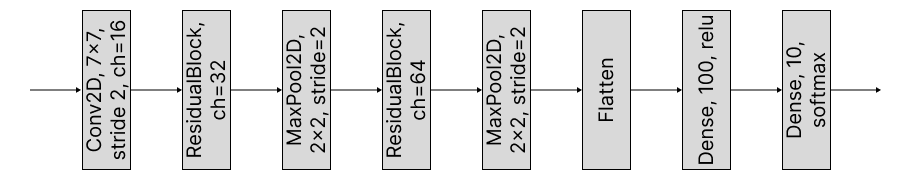

In [113]:
def ResNet7():
  X = layers.Input((28,28,1))

  y = layers.Conv2D(16, kernel_size = 7, strides = 2)(X)
  y = ResidualBlock(y, 32, 3)

  y = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(y)
  y = ResidualBlock(y, 64, 3)
  
  y = layers.Flatten()(y)
  y = layers.Dense(100, activation = "relu")(y)
  y = layers.Dense(10, activation = "softmax")(y)



  model = models.Model(inputs=X, outputs=y)

  model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

  return model
  ### Please fill here

In [114]:
def ResNet7_Dropout():
  X = layers.Input((28,28,1))

  y = layers.Conv2D(16, kernel_size = 7, strides = 2)(X)
  y = ResidualBlock(y, 32, 3)

  y = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(y)
  y = ResidualBlock(y, 64, 3)
  
  y = layers.Flatten()(y)
  y = layers.Dense(100, activation = "relu")(y)
  y = layers.Dropout(rate=0.3)(y)
  y = layers.Dense(10, activation = "softmax")(y)



  model = models.Model(inputs=X, outputs=y)

  model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

  return model
  ### Please fill here

In [115]:
def add_regularization(model, regularizer=keras.regularizers.l2(0.001)):

    for layer in model.layers:
        for attr in ['kernel_regularizer']:
            if hasattr(layer, attr):
              setattr(layer, attr, regularizer)
    return model

### Model instantiation

In [116]:
model = ResNet7()

In [117]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_90 (Conv2D)             (None, 11, 11, 16)   800         ['input_19[0][0]']               
                                                                                                  
 batch_normalization_67 (BatchN  (None, 11, 11, 16)  64          ['conv2d_90[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_33 (Add)                   (None, 11, 11, 16)   0           ['batch_normalization_67[0

In [118]:
model_dropout = ResNet7_Dropout()

In [119]:
model_dropout.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_95 (Conv2D)             (None, 11, 11, 16)   800         ['input_20[0][0]']               
                                                                                                  
 batch_normalization_71 (BatchN  (None, 11, 11, 16)  64          ['conv2d_95[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_35 (Add)                   (None, 11, 11, 16)   0           ['batch_normalization_71[0

In [120]:
model_dropout_L2=add_regularization(model_dropout)

In [121]:
model_dropout_L2.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_95 (Conv2D)             (None, 11, 11, 16)   800         ['input_20[0][0]']               
                                                                                                  
 batch_normalization_71 (BatchN  (None, 11, 11, 16)  64          ['conv2d_95[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_35 (Add)                   (None, 11, 11, 16)   0           ['batch_normalization_71[0

### Training loop

In [122]:
history = model.fit(
    X_train, 
    y_train, 
    batch_size = 256, 
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 3s 5ms/step - loss: 0.3036 - accuracy: 0.9081 - val_loss: 0.2920 - val_accuracy: 0.9608
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0855 - accuracy: 0.9735 - val_loss: 0.0776 - val_accuracy: 0.9773
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.0551 - val_accuracy: 0.9825
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0459 - accuracy: 0.9857 - val_loss: 0.0448 - val_accuracy: 0.9861
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0439 - val_accuracy: 0.9861
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0474 - val_accuracy: 0.9850
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0387 - val_accuracy: 0.9882
Epoch 

In [123]:
history_dropout = model_dropout.fit(
    X_train, 
    y_train, 
    batch_size = 256, 
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 3s 6ms/step - loss: 0.4664 - accuracy: 0.8611 - val_loss: 0.2455 - val_accuracy: 0.9564
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1425 - accuracy: 0.9563 - val_loss: 0.0735 - val_accuracy: 0.9774
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0987 - accuracy: 0.9704 - val_loss: 0.0563 - val_accuracy: 0.9822
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0789 - accuracy: 0.9766 - val_loss: 0.0530 - val_accuracy: 0.9825
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0694 - accuracy: 0.9790 - val_loss: 0.0444 - val_accuracy: 0.9852
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0602 - accuracy: 0.9815 - val_loss: 0.0450 - val_accuracy: 0.9854
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0543 - accuracy: 0.9832 - val_loss: 0.0401 - val_accuracy: 0.9862
Epoch 

In [124]:
history_dropout_L2 = model_dropout_L2.fit(
    X_train, 
    y_train, 
    batch_size = 256, 
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 0.0323 - val_accuracy: 0.9899
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0347 - val_accuracy: 0.9894
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.0411 - val_accuracy: 0.9887
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0367 - val_accuracy: 0.9901
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0353 - val_accuracy: 0.9894
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0367 - val_accuracy: 0.9896
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0347 - val_accuracy: 0.9894
Epoch 

### Plot training curve

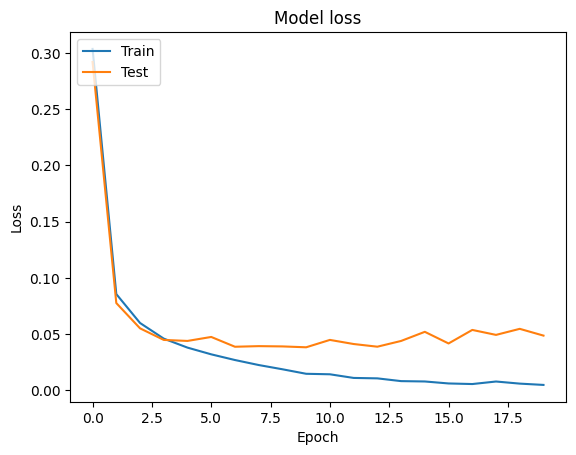

In [125]:
# regularization 없음
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [126]:
import pandas as pd
dic_hist = {"loss":history.history["loss"],"val_loss":history.history["val_loss"]} 
naive = pd.DataFrame(dic_hist)
naive.describe()

,loss,val_loss
count,20.000000,20.000000
mean,0.036454,0.059203
std,0.066335,0.055539
min,0.004742,0.038215
25%,0.007799,0.040655
50%,0.014424,0.044775
75%,0.033439,0.052396
max,0.303617,0.291990


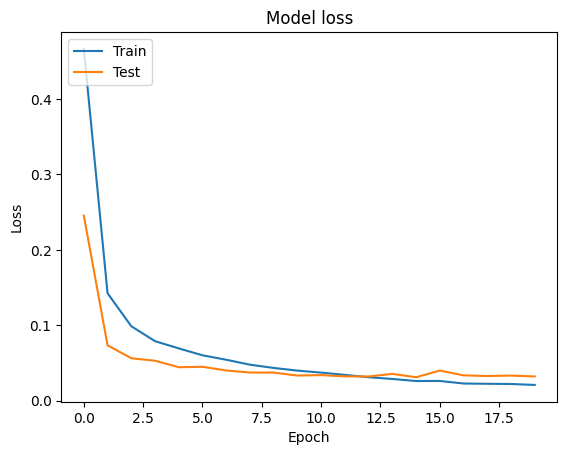

In [127]:
# droup out 추가 
plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [128]:
import pandas as pd
dic_hist = {"loss":history_dropout.history["loss"],"val_loss":history_dropout.history["val_loss"]} 
drop = pd.DataFrame(dic_hist)
drop.describe()

,loss,val_loss
count,20.000000,20.000000
mean,0.068692,0.050138
std,0.098482,0.047175
min,0.020944,0.031125
25%,0.026174,0.033173
50%,0.038603,0.036441
75%,0.062517,0.044569
max,0.466390,0.245488


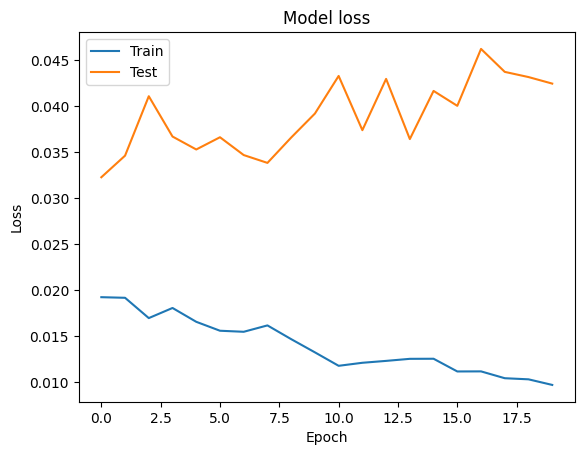

In [129]:
# droup out, L2 추가 
plt.plot(history_dropout_L2.history['loss'])
plt.plot(history_dropout_L2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [130]:
import pandas as pd
dic_hist = {"loss":history_dropout_L2.history["loss"],"val_loss":history_dropout_L2.history["val_loss"]} 
drop_L2 = pd.DataFrame(dic_hist)
drop_L2.describe()

,loss,val_loss
count,20.000000,20.000000
mean,0.013994,0.038945
std,0.003017,0.003971
min,0.009735,0.032307
25%,0.011661,0.036174
50%,0.012927,0.038327
75%,0.016302,0.042614
max,0.019271,0.046256


### Question 1. Report training curve (Epoch vs. Loss) and final validation accuracy without any regularization method.

#### Answer:

### Question 2. Report training curve (Epoch vs. Loss) and final validation accuracy with dropout applied (dropout rate: 0.3). Explain how you applied dropout on your code.

#### Answer:

### Question 3. Report training curve (Epoch vs. Loss) and final validation accuracy with dropout and weight decay applied (L2 regularization with 0.001). Explain how you applied weight decay on your code.

#### Answer: